In [1]:
# Cargar bibliotecas necesarias
# Para instalarlas por primera vez: install.packages("ggplot2")
# 
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# Leer archivo de datos diarios
df0 <- read.csv(file="UV-RS_2016.csv", header=T, sep=";", stringsAsFactors=FALSE)
df0$ID <- NULL
df0$Batt <- NULL
names(df0) <- c("Year", "DOY", "Clock", "UV", "RS")
df0$DOY <- as.numeric(df0$DOY)
df0$Clock <- as.numeric(df0$Clock)
str(df0)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

'data.frame':	52704 obs. of  5 variables:
 $ Year : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ DOY  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Clock: num  600 1200 1800 2400 3000 3600 4200 4800 5400 6000 ...
 $ UV   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ RS   : num  0 0 0 0 0 0 0 0 0 0 ...


In [3]:
# Create a new Time variable 
df0$Time <- ((df0$DOY-1.0)*86400.0 + df0$Clock)/86400.0

In [4]:
# Fill -9999 with NA
#df[df == 0] <- NA
df0$UV[df0$UV == -9999] <- NA
df0$RS[df0$RS == -9999] <- NA
tail(df0)

,Year,DOY,Clock,UV,RS,Time
52699,2016,366,83400,NA,NA,365.9653
52700,2016,366,84000,NA,NA,365.9722
52701,2016,366,84600,NA,NA,365.9792
52702,2016,366,85200,NA,NA,365.9861
52703,2016,366,85800,NA,NA,365.9931
52704,2016,366,86400,NA,NA,366.0000


In [5]:
# Drop number of lines with NA values
df1 <- df0[complete.cases(df0), ]
str(df1)

'data.frame':	49855 obs. of  6 variables:
 $ Year : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ DOY  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Clock: num  600 1200 1800 2400 3000 3600 4200 4800 5400 6000 ...
 $ UV   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ RS   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Time : num  0.00694 0.01389 0.02083 0.02778 0.03472 ...


Warning message:
“Removed 48846 rows containing missing values (geom_path).”Warning message:
“Removed 48846 rows containing missing values (geom_path).”

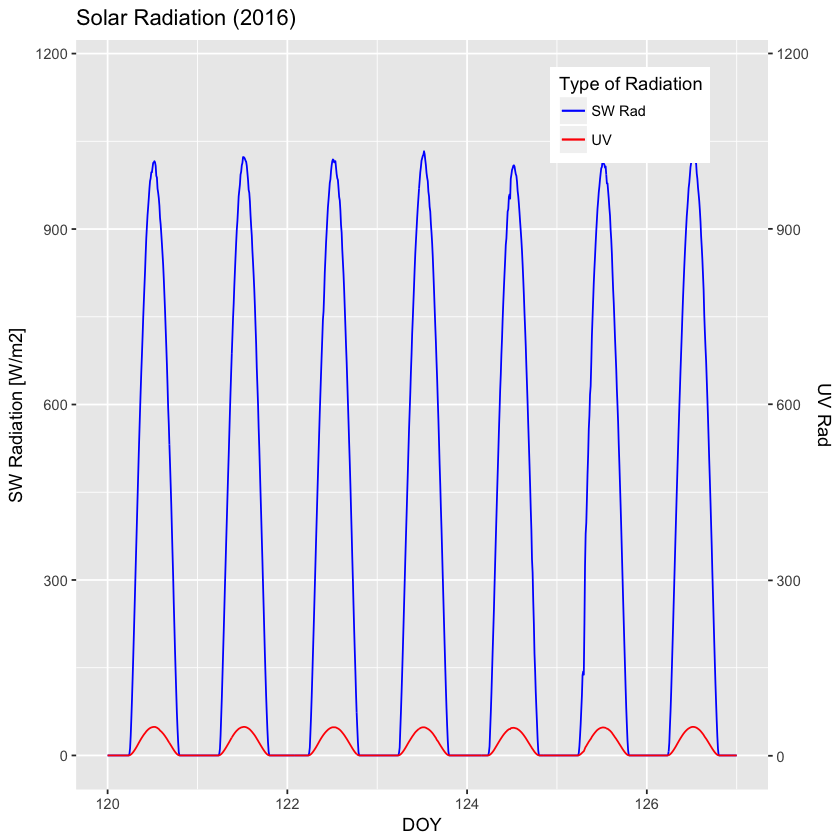

In [45]:
p <- ggplot(df1, aes(x = Time))
  p <- p + geom_line(aes(y = RS, colour = "SW Rad"))
  
  # adding the relative humidity data, transformed to match roughly the range of the temperature
  p <- p + geom_line(aes(y = UV, colour = "UV"))
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p <- p + scale_y_continuous(sec.axis = sec_axis(~., name = "UV Rad"))
  
  # modifying colours and theme options
  p <- p + scale_colour_manual(values = c("blue", "red"))
  p <- p + labs(y = "SW Radiation [W/m2]",
                x = "DOY",
                colour = "Type of Radiation")
  p <- p + theme(legend.position = c(0.8, 0.9)) + xlim(120,127) + labs(title = "Solar Radiation (2016)")
p

Warning message:
“Removed 48846 rows containing missing values (geom_path).”Warning message:
“Removed 48846 rows containing missing values (geom_path).”

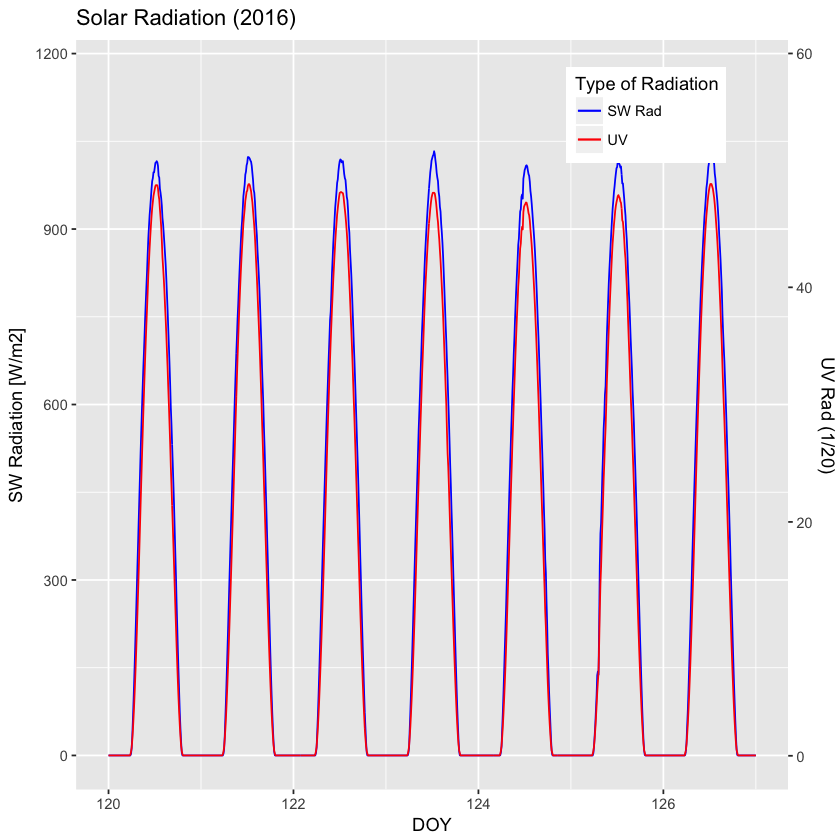

In [43]:
p <- ggplot(df1, aes(x = Time))
  p <- p + geom_line(aes(y = RS, colour = "SW Rad"))
  
  # adding the relative humidity data, transformed to match roughly the range of the temperature
  p <- p + geom_line(aes(y = UV/0.05, colour = "UV"))
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p <- p + scale_y_continuous(sec.axis = sec_axis(~.*.05, name = "UV Rad (1/20)"))
  
  # modifying colours and theme options
  p <- p + scale_colour_manual(values = c("blue", "red"))
  p <- p + labs(y = "SW Radiation [W/m2]",
                x = "DOY",
                colour = "Type of Radiation")
  p <- p + theme(legend.position = c(0.8, 0.9)) + xlim(120,127) + labs(title = "Solar Radiation (2016)")
p

In [28]:
summary(df1)

      Year           DOY            Clock             UV        
 Min.   :2016   Min.   :  1.0   Min.   :  600   Min.   : 0.000  
 1st Qu.:2016   1st Qu.: 87.0   1st Qu.:22200   1st Qu.: 0.000  
 Median :2016   Median :174.0   Median :43200   Median : 0.416  
 Mean   :2016   Mean   :175.8   Mean   :43494   Mean   :10.899  
 3rd Qu.:2016   3rd Qu.:260.0   3rd Qu.:64800   3rd Qu.:21.645  
 Max.   :2016   Max.   :356.0   Max.   :86400   Max.   :54.050  
       RS                Time         
 Min.   :   0.000   Min.   :  0.0069  
 1st Qu.:   0.000   1st Qu.: 86.5660  
 Median :   6.608   Median :173.1181  
 Mean   : 255.654   Mean   :175.2831  
 3rd Qu.: 533.100   3rd Qu.:259.6701  
 Max.   :1165.000   Max.   :356.0000  

Warning message:
“Removed 49710 rows containing missing values (geom_path).”Warning message:
“Removed 49710 rows containing missing values (geom_path).”

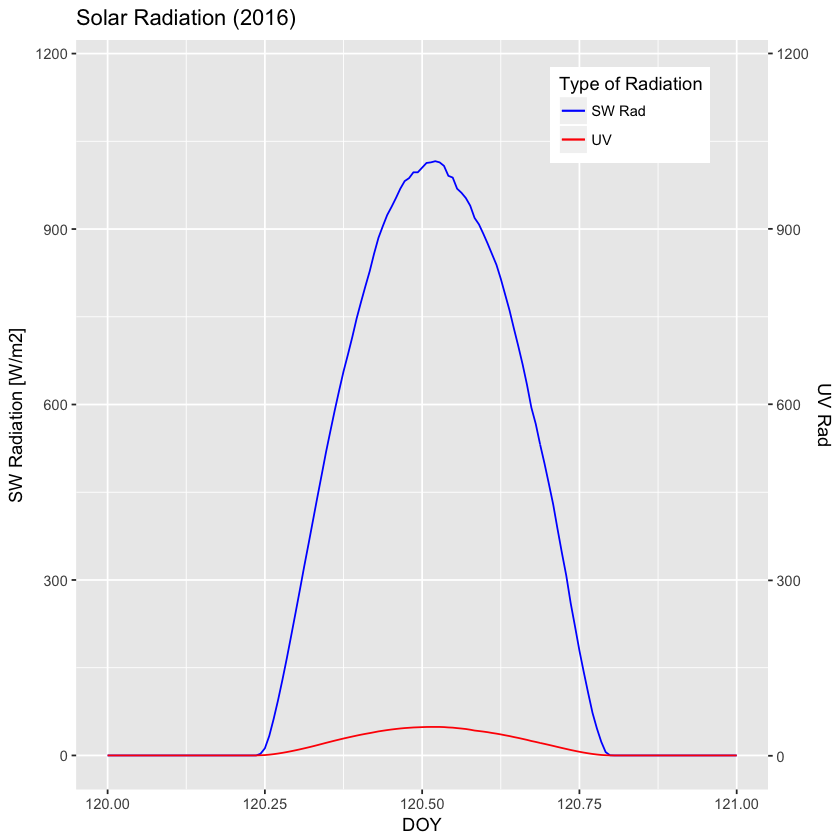

In [47]:
p <- ggplot(df1, aes(x = Time))
  p <- p + geom_line(aes(y = RS, colour = "SW Rad"))
  
  # adding the relative humidity data, transformed to match roughly the range of the temperature
  p <- p + geom_line(aes(y = UV, colour = "UV"))
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p <- p + scale_y_continuous(sec.axis = sec_axis(~., name = "UV Rad"))
  
  # modifying colours and theme options
  p <- p + scale_colour_manual(values = c("blue", "red"))
  p <- p + labs(y = "SW Radiation [W/m2]",
                x = "DOY",
                colour = "Type of Radiation")
  p <- p + theme(legend.position = c(0.8, 0.9)) + xlim(120,121) + labs(title = "Solar Radiation (2016)")
p

Warning message:
“Removed 49710 rows containing missing values (geom_path).”Warning message:
“Removed 49710 rows containing missing values (geom_path).”

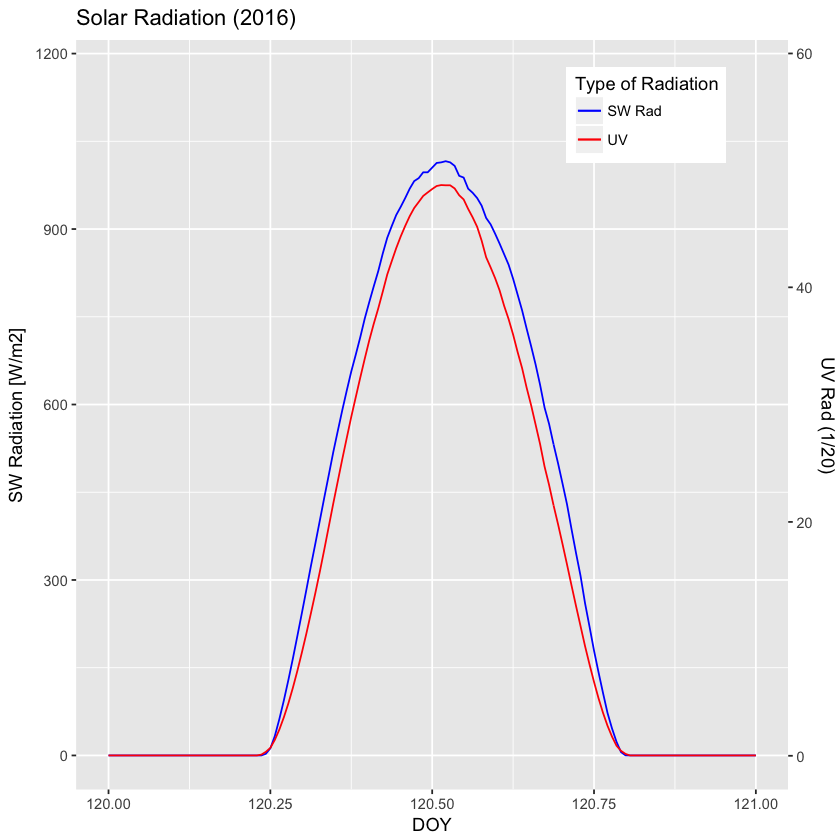

In [48]:
p <- ggplot(df1, aes(x = Time))
  p <- p + geom_line(aes(y = RS, colour = "SW Rad"))
  
  # adding the relative humidity data, transformed to match roughly the range of the temperature
  p <- p + geom_line(aes(y = UV/0.05, colour = "UV"))
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p <- p + scale_y_continuous(sec.axis = sec_axis(~.*.05, name = "UV Rad (1/20)"))
  
  # modifying colours and theme options
  p <- p + scale_colour_manual(values = c("blue", "red"))
  p <- p + labs(y = "SW Radiation [W/m2]",
                x = "DOY",
                colour = "Type of Radiation")
  p <- p + theme(legend.position = c(0.8, 0.9)) + xlim(120,121) + labs(title = "Solar Radiation (2016)")
p